## Content Based recommendation system

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
df = pd.read_csv("D:/Courses/big data/project/Anime/anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#### Exploring the data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


In [32]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

#### For Cotent based recommender system we will be using { Name, Genre, Type} column

In [33]:
# preprocessing
# filling NaN "Type" with unknown
df.loc[(df['type'].isnull()), 'type'] = 'Unknown'
# filling NaN "Genre" with unknown
df.loc[(df['genre'].isnull()), 'genre'] = 'Unknown'

In [34]:
df.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

In [35]:
# Removing punctuation
#df['name'] = df['name'].str.replace('[^\w\s]','')
#df['name'].head()

In [36]:
# Dropping unwanted columns
df.drop(['rating', 'members', 'episodes'], axis=1, inplace=True)
df.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [37]:
# Converting to lower case
df['genre'] = df['genre'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [38]:
# tokenization of keywords
#from textblob import TextBlob
#df['genre'] = df['genre'].apply(lambda x: TextBlob(x).words)
#df['type'] = df['type'].apply(lambda x: TextBlob(x).words)
#df['episodes'] = df['episodes'].apply(lambda x: TextBlob(x).words)
#df.head()

In [39]:
df['bag_of_words'] = ""
df.loc[:,'bag_of_words'] = df.loc[:, 'genre'] +', '+ df.loc[:, 'type']

In [40]:
# Data after preprocessing
df.head()

,anime_id,name,genre,type,bag_of_words
0,32281,Kimi no Na wa.,"drama, romance, school, supernatural",Movie,"drama, romance, school, supernatural, Movie"
1,5114,Fullmetal Alchemist: Brotherhood,"action, adventure, drama, fantasy, magic, mili...",TV,"action, adventure, drama, fantasy, magic, mili..."
2,28977,Gintama°,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."
3,9253,Steins;Gate,"sci-fi, thriller",TV,"sci-fi, thriller, TV"
4,9969,Gintama&#039;,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."


### Using sklearn TFIDF implementation

In [41]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df["bag_of_words"])

In [42]:
bag = vectorizer.get_feature_names()

In [43]:
# Using Cosine to obtain similaritier between two animes
cosine_sim = cosine_similarity(tfidf, tfidf)

In [44]:
cosine_sim.shape

(12294, 12294)

In [45]:
# recommender function
def recommendation(name, cosine_sim):
    recommended = np.array([])
    index_ = df.loc[(df['name'] == name)].index
    score = cosine_sim[index_]
    ind = np.argpartition(score[0], -10)[-11:]
    ind = ind[np.argsort(score[0][ind])]
    print(score[0][ind])
    #for i in ind:
     #   recommended = np.append(recommended, df.loc[(df.index == i)]['name'])        
    return ind

In [46]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.9394034  0.9394034  0.9394034  0.9394034  0.96155633 0.96155633
 0.96155633 0.96155633 0.96155633 1.         1.        ]
[ 1854   959  3592  2524 10953   290   101   268   795   255   288]


,anime_id,name,genre,type
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
255,22043,Fairy Tail (2014),"action, adventure, comedy, fantasy, magic, sho...",TV


## TF - IDF implementation without library

In [47]:
# Calculating TF
tf = df['bag_of_words'].apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).reset_index()
tf.columns = ['words','tf']

# removing duplicate words
for i,word1 in enumerate(tf['words']):
    tf.loc[i, 'words']= word1.strip()
tf2 = {}
for i,word1 in enumerate(tf['words']):
    if word1 not in tf2.keys():
        tf2[word1] = tf.loc[i, 'tf']
    else:
        tf2[word1] += tf.loc[i, 'tf']
tf = pd.DataFrame.from_dict(tf2, orient='index').reset_index()
tf.columns = ['words','tf']
tf.head()

,words,tf
0,romance,1464.0
1,school,1220.0
2,drama,2016.0
3,Movie,2348.0
4,supernatural,1037.0


In [48]:
# Calculating IDF
N = df.shape[0]
idf = {}
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))
    idf[word] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))


In [49]:
# Creating tfidf vectors
tff = pd.DataFrame(columns=tf['words'])
for i in range(N):
    dict_ = dict.fromkeys(tf['words'], 0)
    for word in df['bag_of_words'][i].split(", "):
        dict_[word] = (1/len(df['bag_of_words'][i].split(", "))) * idf[word]
    tff = tff.append(dict_, ignore_index=True)
tff.head()

words,romance,school,drama,Movie,supernatural,TV,action,shounen,magic,military,...,Music,cars,ONA,kids,shoujo ai,unknown,Unknown,hentai,yaoi,yuri
0,0.425588,0.462052,0.361599,0.331109,0.494556,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.225999,0.000000,0.000000,0.147192,0.182944,0.241843,0.345018,0.420303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.147192,0.182944,0.241843,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.392512,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.147192,0.182944,0.241843,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
cosine_sim_ = cosine_similarity(tff, tff)

### Comparing both with and without library tfidf implementation and recommending on the basis of contents

In [51]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim_)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.94857288 0.94857288 0.94857288 0.94857288 0.97758854 0.97758854
 0.97758854 0.97758854 0.97758854 1.         1.        ]
[ 2524  1854  3592   959   101   268   795 10953   290   288   255]


,anime_id,name,genre,type
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
288,6702,Fairy Tail,"action, adventure, comedy, fantasy, magic, sho...",TV


## Creating user profile and recommending movies 

In [52]:
user_ratings = pd.read_csv("D:/Courses/big data/project/Anime/rating.csv")

In [53]:
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
-1,1476496,1476496
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019


In [54]:
# dropping missing ratings
user_ratings.drop(user_ratings[user_ratings['rating']==-1].index, axis=0, inplace=True)
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019
9,1254096,1254096


In [55]:
# Data generation
import random
def get_test_data():
    # random.seed(123)
    #user = random.randint(1, max(user_ratings['user_id']))    
    #print("User selected for predictions UserId:", (user))
    # generated in Collaborative filtering for comparing the results
    test_data_users = [36112, 23604, 26867, 30558, 55900, 21256, 40027, 67337, 69934, 61587, 18357, 16907, 57904, 69741, 14220, 37539, 53879, 45611, 50095, 53348, 36318, 8157, 29255, 67689, 57239, 7740, 12496, 27932, 60977, 36703, 8520, 62520, 46291, 41439, 27950, 71103, 70437, 27763, 64931, 49575, 12316, 14039, 13887, 11891, 1133, 58817, 58038, 23077, 6422, 36364]
    test_data_animes = pd.read_csv("D:/Courses/big data/project/BigDataProject/data/test_data_animes.csv")
    return test_data_users, test_data_animes['test_animes'].to_list()

In [56]:
training_data = user_ratings.copy(deep=True)

In [57]:
training_data.loc[training_data['anime_id']==8491].index

Int64Index([ 153205,  182503,  319533,  396994,  615796,  659641,  721424,
             728053,  774172,  858794,  955190, 1060093, 1353393, 1363113,
            1428981, 1446362, 1455698, 1591071, 1613710, 1769678, 1887759,
            2022848, 2234798, 2245261, 2388499, 2395450, 2429243, 2516988,
            2629365, 2663007, 2687456, 2756538, 2904720, 2973428, 3012848,
            3065487, 3120339, 3196064, 3277722, 3464780, 3530465, 3654033,
            3743113, 3826181, 3887317, 3935387, 3994282, 4076305, 4188306,
            4211510, 4282292, 4400271, 4407027, 4535377, 4586836, 4652296,
            4653529, 4664174, 4689479, 4739185, 4838625, 4869114, 5012571,
            5022658, 5153717, 5234659, 5262434, 5482219, 5617663, 5655924,
            5665657, 5730161, 5734810, 5737356, 5875031, 6044223, 6117684,
            6152403, 6205112, 6282541, 6467823, 6590549, 6693355, 7028790,
            7064308, 7106535, 7109605, 7115858, 7124010, 7137453, 7183040,
            7242105, 7251

Text(0, 0.5, 'Frequency')

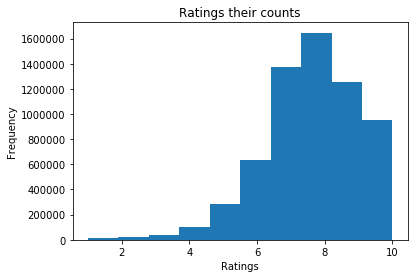

In [58]:
# create figure and axis
fig, ax = plt.subplots()
ax.hist(user_ratings['rating'])
ax.set_title('Ratings their counts')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')

In [67]:
def create_user_profile(user):
    data = training_data.loc[training_data['user_id']==user]
    
    # shifting the rating with center at zero
    mean = data.mean()['rating']
    #data['likeness'] = 0
    data = data.assign(likeness=0)
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
    
    # creating user table for all the movies rated by him/her
    #user_prof = pd.DataFrame(columns=bag)
    user_prof = pd.DataFrame(columns=tf['words'])
    for id in data['anime_id']:
        dict_ = dict.fromkeys(tf['words'], 0)
        for word in df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '):
            #if word in tf['words']:
                #dict_[word] = tf.loc[(tf.words == word)]['tfidf'][tf.loc[(tf.words == word), 'tfidf'].index[0]]
            dict_[word] = (1/len(df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '))) * idf[word]
        #print(dict_)    
        user_prof = user_prof.append(dict_, ignore_index=True)
    # Creating user prfile by doing weighted sum of the attributes he/she has rated
    user_profile = []
    for col in user_prof.columns:
        user_profile.append(user_prof[col] @ data['likeness'].values)
    return user_profile, data

In [131]:
def evaluation_metrics(cosine_sim_, data):
    predicted_likeness = {}
    for x in data["anime_id"]:
        predicted_likeness[x] = cosine_sim_[0][df.loc[df['anime_id']==x].index[0]]
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    precision = 0
    recall = 0
    accuracy = 0
    for x in predicted_likeness.keys():
        predic = predicted_likeness[x]
        actual = data.loc[data["anime_id"]==x, 'likeness'].values[0]
        if predic >= 0 and actual >= 0:
            true_pos += 1
        elif predic >= 0 and actual < 0:
            false_pos += 1
        elif predic < 0 and actual >= 0:
            false_neg += 1
        else:
            true_neg += 1
    print("true_pos : "+ str(true_pos) +"\ntrue_neg : "+str(true_neg)+"\nfalse_pos : "+ str(false_pos) +"\nfalse_neg : "+ str(false_neg) +"\n")
    if (true_pos + false_pos) != 0:
        precision = true_pos/(true_pos + false_pos)
    if (true_pos + false_neg) != 0:
        recall = true_pos/(true_pos + false_neg)
    accuracy = (true_pos + true_neg)/(true_pos + false_neg + true_neg + false_pos)
    print("Precision : "+str(precision*100) + "\nRecall : "+str(recall*100)+"\nAccuracy : "+str(accuracy*100))
    return accuracy

In [61]:
# recommender function
def recommendation_with_user_profile(user):
    cosine_sim_user = cosine_similarity(user, tff)
    ind = np.argpartition(cosine_sim_user[0], -10)[-10:]
    ind = ind[np.argsort(cosine_sim_user[0][ind])]    
    return ind, cosine_sim_user

In [118]:
def grad_descent(user, user_p):
    # creating user vector from user dictionary
    user_prof = []    
    for u in user_p.keys():
        user_prof.append(user_p[u])
    user_prof = np.asarray(user_prof)
    user_prof = user_prof.reshape(-1, 51)
    print(user_prof)
    cosine_sim_user = cosine_similarity(user_prof, tff)
    data = training_data.loc[training_data['user_id']==user]
    mean = data.mean()['rating']
    data = data.assign(likeness=0)
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
    predicted_likeness = {}
    for x in data["anime_id"]:
        predicted_likeness[x] = cosine_sim_user[0][df.loc[df['anime_id']==x].index[0]]
        
    for x in predicted_likeness.keys():
        predic = predicted_likeness[x]
        actual = data.loc[data["anime_id"]==x, 'likeness'].values[0]
        if predic >= 0 and actual < 0:
            for word in df.loc[df['anime_id']==x]['bag_of_words'].values[0].split(', '):
                tfidf_score = (1/len(df.loc[df['anime_id']==x]['bag_of_words'].values[0].split(', '))) * idf[word]
                user_p[word] -= 0.001*tfidf_score
        elif predic < 0 and actual >= 0:
            for word in df.loc[df['anime_id']==x]['bag_of_words'].values[0].split(', '):
                tfidf_score = (1/len(df.loc[df['anime_id']==x]['bag_of_words'].values[0].split(', '))) * idf[word]
                user_p[word] += 0.001*tfidf_score
    return user_p

In [135]:
def grad_descent2(user, user_p, anime, data):
    # creating user vector from user dictionary
    user_prof = []    
    for u in user_p.keys():
        user_prof.append(user_p[u])
    user_prof = np.asarray(user_prof)
    user_prof = user_prof.reshape(-1, 51)
    print(user_prof)
    cosine_sim_user = cosine_similarity(user_prof, tff)
    predic = cosine_sim_user[0][df.loc[df['anime_id']==anime].index[0]]
    actual = data.loc[data["anime_id"]==anime, 'likeness'].values[0]
    if predic >= 0 and actual < 0:
        for word in df.loc[df['anime_id']==anime]['bag_of_words'].values[0].split(', '):
            tfidf_score = (1/len(df.loc[df['anime_id']==anime]['bag_of_words'].values[0].split(', '))) * idf[word]
            user_p[word] -= 0.01*tfidf_score
    elif predic < 0 and actual >= 0:
        for word in df.loc[df['anime_id']==anime]['bag_of_words'].values[0].split(', '):
            tfidf_score = (1/len(df.loc[df['anime_id']==anime]['bag_of_words'].values[0].split(', '))) * idf[word]
            user_p[word] += 0.01*tfidf_score
    return user_p

In [137]:
#Gradient descent2
user = 59325
epoch = 0
# initializing user profile
user_p = dict.fromkeys(tf['words'], 0)
accuracy = 0
data = training_data.loc[training_data['user_id']==user]
mean = data.mean()['rating']
data = data.assign(likeness=0)
data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
while epoch != 10 and accuracy < 0.8:
    for anime in data["anime_id"]:
        user_p = grad_descent2(user, user_p, anime, data)
        user_prof = [] 
        for u in user_p.keys():#sorted(user_p.keys()):
            user_prof.append(user_p[u])
        user_prof = np.asarray(user_prof)
        user_prof = user_prof.reshape(-1, 51)
        cosine_sim_user = cosine_similarity(user_prof, tff)
        accuracy = evaluation_metrics(cosine_sim_user, data)  
    epoch += 1
    print("epoch : " + str(epoch))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
true_pos : 464
true_neg : 0
false_pos : 210
false_neg : 0

Precision : 68.84272997032642
Recall : 100.0
Accuracy : 68.84272997032642
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
true_pos : 464
true_neg : 0
false_pos : 210
false_neg : 0

Precision : 68.84272997032642
Recall : 100.0
Accuracy : 68.84272997032642
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
true_pos : 464
true_neg : 0
false_pos : 210
false_neg : 0

Precision : 68.84272997032642
Recall : 100.0
Accuracy : 68.84272997032642
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
true_pos : 464
true_neg : 0
false_pos : 210
false_neg : 0

Precision : 68.84272997032642
Recall : 100.0
Accuracy : 68.84272997032642
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

true_pos : 333
true_neg : 71
false_pos : 139
false_neg : 131

Precision : 70.55084745762711
Recall : 71.76724137931035
Accuracy : 59.940652818991104
[[ 0.00110542  0.00385043 -0.00041678 -0.00055185 -0.00224798  0.00040143
   0.00076028  0.00322458  0.         -0.00305675 -0.00150504 -0.00152027
   0.         -0.00059385  0.00631379  0.0016222   0.00389255  0.0061887
   0.          0.          0.          0.00187409  0.         -0.00085558
   0.          0.00401539 -0.00412631  0.00548162  0.          0.
   0.00516708  0.00365122  0.00119525  0.         -0.0033939   0.
   0.          0.          0.          0.00656038  0.          0.
  -0.008567    0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 333
true_neg : 71
false_pos : 139
false_neg : 131

Precision : 70.55084745762711
Recall : 71.76724137931035
Accuracy : 59.940652818991104
[[ 0.00110542  0.00385043 -0.00041678 -0.00055185 -0.00224798  0.00040143
   0.00076028  0.00322458  0.

true_pos : 423
true_neg : 27
false_pos : 183
false_neg : 41

Precision : 69.80198019801979
Recall : 91.16379310344827
Accuracy : 66.76557863501483
[[ 0.00199206  0.00096261 -0.00041678  0.00181322  0.00540586  0.00089207
   0.00102163  0.00322458  0.00115006  0.00174672  0.00086002 -0.00361064
   0.          0.00195124  0.00631379  0.00202775  0.00389255  0.0061887
   0.          0.          0.          0.00187409  0.         -0.00085558
   0.          0.00401539  0.00106105  0.00548162  0.         -0.00367103
   0.00516708  0.00365122  0.00620392  0.         -0.0033939   0.
   0.          0.          0.          0.00656038  0.          0.
  -0.008567    0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 269
true_neg : 95
false_pos : 115
false_neg : 195

Precision : 70.05208333333334
Recall : 57.974137931034484
Accuracy : 54.00593471810089
[[-0.0015545   0.00096261 -0.00041678  0.00181322  0.00540586 -0.00107049
   0.00102163  0.003224

true_pos : 397
true_neg : 32
false_pos : 178
false_neg : 67

Precision : 69.04347826086956
Recall : 85.5603448275862
Accuracy : 63.649851632047486
[[ 0.00057344  0.00327287  0.00139122  0.00181322  0.00540586  0.00010705
   0.00102163  0.00322458  0.0039102   0.00174672  0.00086002 -0.00193834
   0.         -0.00101804  0.00631379  0.00137887  0.00389255  0.0061887
   0.          0.          0.          0.00187409  0.         -0.00085558
   0.          0.00401539  0.00417347  0.00548162  0.         -0.00367103
   0.00516708  0.00365122  0.00620392  0.         -0.0033939  -0.0019734
   0.          0.          0.          0.00656038 -0.00243864  0.
  -0.008567    0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 288
true_neg : 93
false_pos : 117
false_neg : 176

Precision : 71.11111111111111
Recall : 62.06896551724138
Accuracy : 56.52818991097923
[[-0.00208649  0.00327287 -0.00086878  0.00181322  0.00540586 -0.00136487
  -0.0008078   0.

true_pos : 454
true_neg : 13
false_pos : 197
false_neg : 10

Precision : 69.73886328725038
Recall : 97.84482758620689
Accuracy : 69.28783382789318
[[ 0.00124897  0.00327287  0.00196518  0.00181322  0.00265833  0.00283594
   0.00102163  0.00322458  0.0039102   0.00174672  0.00233162  0.00045065
   0.          0.00254509  0.00631379  0.0036345   0.00389255  0.0061887
   0.          0.          0.          0.00187409 -0.00132015  0.0042779
   0.          0.00401539  0.00417347  0.00548162  0.          0.00313494
   0.00516708 -0.0007745   0.00230829  0.         -0.0033939  -0.0019734
   0.          0.          0.          0.00656038 -0.00243864  0.
  -0.008567    0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 454
true_neg : 13
false_pos : 197
false_neg : 10

Precision : 69.73886328725038
Recall : 97.84482758620689
Accuracy : 69.28783382789318
[[ 0.00124897  0.00327287  0.00196518  0.00181322  0.00265833  0.00283594
   0.00102163  0.00

true_pos : 454
true_neg : 6
false_pos : 204
false_neg : 10

Precision : 68.9969604863222
Recall : 97.84482758620689
Accuracy : 68.24925816023739
[[ 0.00052354  0.00537311 -0.00029481  0.00181322  0.00490631  0.00243451
  -0.0008078   0.00498344  0.00296924  0.00174672  0.00233162 -0.00011945
   0.          0.00254509  0.00631379  0.00451934  0.00389255  0.0061887
   0.         -0.00111642  0.          0.00187409 -0.00132015  0.0042779
   0.          0.00401539  0.00417347  0.00548162  0.         -0.00053609
   0.00516708 -0.0007745   0.00230829  0.         -0.0033939   0.0007176
   0.          0.          0.          0.00656038  0.00088678  0.
  -0.008567    0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 454
true_neg : 6
false_pos : 204
false_neg : 10

Precision : 68.9969604863222
Recall : 97.84482758620689
Accuracy : 68.24925816023739
[[ 0.00052354  0.00537311 -0.00029481  0.00181322  0.00490631  0.00243451
  -0.0008078   0.004983

true_pos : 313
true_neg : 90
false_pos : 120
false_neg : 151

Precision : 72.2863741339492
Recall : 67.45689655172413
Accuracy : 59.79228486646885
[[-0.00213638 -0.00040255  0.00045852  0.00181322  0.00490631  0.00145323
  -0.00019799  0.00256501 -0.00048093  0.00174672  0.00233162 -0.00011945
   0.          0.00254509  0.00631379  0.00208604  0.00389255  0.0061887
   0.0051996  -0.00520996  0.          0.00187409 -0.00132015  0.0042779
   0.          0.00401539  0.00936083  0.0006852   0.         -0.00053609
   0.00516708 -0.0007745   0.00230829  0.         -0.0033939  -0.00668264
   0.          0.          0.          0.00656038 -0.00368568  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 313
true_neg : 90
false_pos : 120
false_neg : 151

Precision : 72.2863741339492
Recall : 67.45689655172413
Accuracy : 59.79228486646885
[[-0.00213638 -0.00040255  0.00045852  0.00181322  0.00490631  0.00145323
  -0.00019799  0.0

true_pos : 223
true_neg : 117
false_pos : 93
false_neg : 241

Precision : 70.56962025316456
Recall : 48.060344827586206
Accuracy : 50.445103857566764
[[-0.00213638 -0.00040255 -0.00664432 -0.00232565 -0.00127564  0.0030887
  -0.00025607  0.00317921 -0.00354776  0.00174672 -0.00364674  0.00041144
   0.         -0.00197951  0.00631379  0.00100457  0.00389255  0.0061887
   0.0051996  -0.00066158  0.          0.00187409 -0.00132015  0.0042779
   0.          0.01204616  0.00936083  0.00616683  0.         -0.00053609
   0.00516708 -0.0007745   0.00230829  0.         -0.0033939  -0.00668264
   0.          0.          0.          0.00656038 -0.00368568  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 223
true_neg : 117
false_pos : 93
false_neg : 241

Precision : 70.56962025316456
Recall : 48.060344827586206
Accuracy : 50.445103857566764
[[-0.00213638 -0.00040255 -0.00664432 -0.00232565 -0.00127564  0.0030887
  -0.00025607 

true_pos : 343
true_neg : 65
false_pos : 145
false_neg : 121

Precision : 70.28688524590164
Recall : 73.92241379310344
Accuracy : 60.534124629080125
[[ 0.00141018 -0.00040255 -0.00965765 -0.00232565  0.00284566  0.00505126
  -0.00025607  0.00962837 -0.00354776  0.00174672 -0.00364674  0.00041144
   0.         -0.00494879  0.00631379  0.00424897  0.00389255  0.0061887
   0.0051996  -0.00066158  0.          0.00187409 -0.00132015  0.0042779
   0.          0.01204616  0.00417347  0.00616683  0.         -0.00053609
   0.00516708 -0.0007745   0.00230829  0.         -0.0033939  -0.00174915
   0.          0.          0.          0.00656038  0.00241093  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 343
true_neg : 65
false_pos : 145
false_neg : 121

Precision : 70.28688524590164
Recall : 73.92241379310344
Accuracy : 60.534124629080125
[[ 0.00141018 -0.00040255 -0.00965765 -0.00232565  0.00284566  0.00505126
  -0.00025607 

true_pos : 418
true_neg : 20
false_pos : 190
false_neg : 46

Precision : 68.75
Recall : 90.08620689655173
Accuracy : 64.98516320474778
[[ 0.00743934 -0.00040255 -0.00754832  0.00457246  0.00490631  0.00348121
   0.0034028   0.0047915  -0.00584787  0.00174672 -0.00364674  0.00459218
   0.         -0.00494879  0.00631379  0.00262677  0.00389255  0.0061887
   0.0051996   0.00752549  0.         -0.00140557  0.00330037 -0.00213895
   0.          0.00401539  0.00936083  0.00616683  0.          0.00533756
   0.00516708 -0.0007745   0.00230829  0.         -0.0033939  -0.00174915
   0.          0.          0.          0.00656038  0.00850754  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 418
true_neg : 20
false_pos : 190
false_neg : 46

Precision : 68.75
Recall : 90.08620689655173
Accuracy : 64.98516320474778
[[ 0.00743934 -0.00040255 -0.00754832  0.00457246  0.00490631  0.00348121
   0.0034028   0.0047915  -0.00584787  0.

true_pos : 319
true_neg : 66
false_pos : 144
false_neg : 145

Precision : 68.89848812095032
Recall : 68.75
Accuracy : 57.12166172106825
[[ 0.00135952 -0.00370292 -0.01271402  0.0022074   0.00137377  0.00179902
   0.00131202  0.0047915  -0.00289058  0.00174672 -0.00364674 -0.00018581
   0.         -0.00494879  0.00631379  0.00366961  0.00389255  0.0061887
   0.0051996   0.00752549  0.          0.00187409  0.00330037 -0.00213895
   0.          0.00401539  0.00936083  0.00616683  0.          0.0011421
   0.00516708 -0.0007745   0.00230829  0.         -0.0033939   0.00565109
   0.          0.          0.          0.00656038  0.00850754  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
true_pos : 319
true_neg : 66
false_pos : 144
false_neg : 145

Precision : 68.89848812095032
Recall : 68.75
Accuracy : 57.12166172106825
[[ 0.00135952 -0.00370292 -0.01271402  0.0022074   0.00137377  0.00179902
   0.00131202  0.0047915  -0.00289058  0

true_pos : 380
true_neg : 46
false_pos : 164
false_neg : 84

Precision : 69.85294117647058
Recall : 81.89655172413794
Accuracy : 63.20474777448071
[[ 5.61539438e-03 -3.70291750e-03 -5.05156166e-03  3.15342369e-03
   1.37376634e-03  1.21024656e-03  9.23957242e-05  2.02757650e-03
  -9.79092985e-03 -3.05675206e-03  2.42359722e-03  2.72080036e-03
   0.00000000e+00 -1.97951415e-03  6.31379192e-03  4.22579574e-03
   0.00000000e+00  6.18869812e-03  5.19959550e-03  7.52549137e-03
   0.00000000e+00  4.06052239e-03  3.30037211e-03 -2.13895038e-03
   0.00000000e+00  4.01538607e-03  9.36083237e-03  6.16682699e-03
   0.00000000e+00  7.01574158e-03  5.16707861e-03 -7.74500342e-04
   2.30828921e-03  0.00000000e+00 -3.39389714e-03  5.65109420e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  6.56037949e-03
   8.50753945e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos 

true_pos : 214
true_neg : 113
false_pos : 97
false_neg : 250

Precision : 68.81028938906752
Recall : 46.12068965517241
Accuracy : 48.516320474777444
[[-9.71083239e-04 -1.08537237e-02 -1.32305911e-02  7.88355922e-04
  -2.15877567e-03 -7.94370326e-05  9.23957242e-05  3.13314661e-03
  -9.79092985e-03 -3.05675206e-03  5.85294548e-05  6.06539398e-03
   0.00000000e+00  1.58361132e-03  6.31379192e-03  1.44488155e-03
  -3.89254696e-03  6.18869812e-03  5.19959550e-03  7.52549137e-03
   0.00000000e+00  4.06052239e-03  4.62052096e-03 -2.13895038e-03
   0.00000000e+00  4.01538607e-03  9.36083237e-03  6.16682699e-03
   0.00000000e+00  2.12103815e-03  5.16707861e-03 -7.74500342e-04
   2.30828921e-03  0.00000000e+00 -3.39389714e-03  5.65109420e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  6.56037949e-03
   3.28187538e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.01588905e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_po

true_pos : 328
true_neg : 66
false_pos : 144
false_neg : 136

Precision : 69.49152542372882
Recall : 70.6896551724138
Accuracy : 58.45697329376854
[[ 0.00754067 -0.00161268 -0.0096146  -0.00335051 -0.00834072  0.00199527
  -0.00234685  0.00700264 -0.00584787 -0.00305675 -0.00447452  0.00566723
   0.          0.00514674  0.00631379 -0.00066398 -0.00389255  0.0061887
   0.0051996   0.00752549  0.          0.00668424  0.00462052 -0.00213895
   0.          0.0086044   0.00936083  0.00616683  0.          0.00212104
   0.00516708 -0.0007745   0.00230829  0.         -0.0033939   0.0098798
   0.          0.          0.          0.00656038  0.00328188  0.
   0.          0.         -0.00338916 -0.00128798  0.          0.
   0.          0.          0.        ]]
true_pos : 328
true_neg : 66
false_pos : 144
false_neg : 136

Precision : 69.49152542372882
Recall : 70.6896551724138
Accuracy : 58.45697329376854
[[ 0.00754067 -0.00161268 -0.0096146  -0.00335051 -0.00834072  0.00199527
  -0.00234685  0.0

true_pos : 333
true_neg : 55
false_pos : 155
false_neg : 131

Precision : 68.23770491803278
Recall : 71.76724137931035
Accuracy : 57.566765578635014
[[ 1.10872373e-02 -1.61268183e-03 -3.58794586e-03  7.68647024e-03
  -1.24620232e-02  3.27093664e-05 -4.78609851e-03  3.77806251e-03
  -5.84787257e-03 -3.05675206e-03 -1.71527137e-03  1.12415508e-02
   0.00000000e+00  5.14673678e-03  6.31379192e-03 -6.63978375e-04
   5.19006262e-03  6.18869812e-03  5.19959550e-03  2.06744268e-03
   0.00000000e+00  6.68424455e-03  4.62052096e-03 -2.13895038e-03
   0.00000000e+00  8.60439872e-03  9.36083237e-03  6.16682699e-03
   0.00000000e+00  2.12103815e-03  5.16707861e-03 -7.74500342e-04
   2.30828921e-03  3.32116889e-03 -3.39389714e-03  4.94630921e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  6.56037949e-03
  -2.81473269e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.38916412e-03 -1.28798415e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_po

true_pos : 364
true_neg : 45
false_pos : 165
false_neg : 100

Precision : 68.80907372400756
Recall : 78.44827586206897
Accuracy : 60.682492581602375
[[ 0.01215121 -0.00738833  0.00032938  0.01182534 -0.00215878 -0.00232237
  -0.00234685  0.00700264 -0.00584787 -0.00305675  0.00104397  0.01124155
   0.          0.00514674  0.00631379 -0.00017732  0.00519006  0.0061887
   0.0051996   0.00206744  0.          0.00668424 -0.00577565 -0.00213895
   0.          0.0086044   0.00936083  0.00616683  0.          0.00212104
   0.00516708 -0.0007745   0.00230829  0.01162409 -0.0033939   0.00494631
   0.          0.          0.          0.00656038 -0.00281473  0.
   0.          0.         -0.00338916 -0.00128798  0.          0.
   0.          0.          0.        ]]
true_pos : 364
true_neg : 45
false_pos : 165
false_neg : 100

Precision : 68.80907372400756
Recall : 78.44827586206897
Accuracy : 60.682492581602375
[[ 0.01215121 -0.00738833  0.00032938  0.01182534 -0.00215878 -0.00232237
  -0.00234685

true_pos : 342
true_neg : 51
false_pos : 159
false_neg : 122

Precision : 68.26347305389223
Recall : 73.70689655172413
Accuracy : 58.30860534124629
[[ 1.64070846e-02 -2.76781207e-03  9.32044108e-04  9.06609310e-03
  -2.15877567e-03 -1.92985262e-03 -7.22534563e-03  5.53483016e-04
  -5.84787257e-03 -3.05675206e-03 -1.71527137e-03  8.45438942e-03
   0.00000000e+00  5.14673678e-03  6.31379192e-03 -1.79951834e-03
   5.19006262e-03  6.18869812e-03  0.00000000e+00  2.06744268e-03
   0.00000000e+00  6.68424455e-03 -5.77565120e-03 -2.13895038e-03
   0.00000000e+00  8.60439872e-03  9.36083237e-03  6.16682699e-03
   0.00000000e+00  2.12103815e-03  5.16707861e-03 -7.74500342e-04
   2.30828921e-03  1.16240911e-02 -3.39389714e-03  1.28142726e-05
   0.00000000e+00  0.00000000e+00  0.00000000e+00  6.56037949e-03
  -2.81473269e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.38916412e-03  9.53108271e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos

true_pos : 222
true_neg : 119
false_pos : 91
false_neg : 242

Precision : 70.92651757188499
Recall : 47.8448275862069
Accuracy : 50.59347181008902
[[ 0.01286052 -0.00276781  0.00093204  0.00906609 -0.00628007 -0.00683626
  -0.01088422  0.00055348 -0.00584787 -0.00305675 -0.00171527  0.00845439
   0.          0.00069283  0.00631379 -0.00342172  0.00519006  0.0061887
   0.         -0.00611963  0.          0.00668424 -0.00577565 -0.00213895
   0.          0.0086044   0.00936083  0.00616683  0.          0.00212104
   0.00516708 -0.0007745   0.00230829  0.01162409 -0.0033939  -0.00492068
   0.          0.          0.          0.00656038 -0.00891134  0.
   0.          0.         -0.00338916  0.00953108  0.          0.
   0.          0.          0.        ]]
true_pos : 222
true_neg : 119
false_pos : 91
false_neg : 242

Precision : 70.92651757188499
Recall : 47.8448275862069
Accuracy : 50.59347181008902
[[ 0.01286052 -0.00276781  0.00093204  0.00906609 -0.00628007 -0.00683626
  -0.01088422  0.

true_pos : 149
true_neg : 162
false_pos : 48
false_neg : 315

Precision : 75.63451776649747
Recall : 32.112068965517246
Accuracy : 46.14243323442137
[[ 0.00665403 -0.00276781 -0.00358795  0.00906609 -0.01040137 -0.00300926
  -0.01149403  0.00442298 -0.01044811  0.00114628 -0.00447452  0.01179898
   0.          0.00351364  0.00631379 -0.00991052  0.00519006  0.0061887
   0.         -0.00611963  0.00434258  0.00449781 -0.00693078 -0.00320843
   0.00332492  0.0086044   0.00417347  0.00616683  0.          0.00212104
  -0.00172236 -0.0007745   0.00230829 -0.00664234 -0.0033939  -0.00492068
   0.          0.          0.          0.00656038 -0.00891134  0.
   0.          0.         -0.00338916  0.00953108  0.          0.
   0.          0.          0.        ]]
true_pos : 149
true_neg : 162
false_pos : 48
false_neg : 315

Precision : 75.63451776649747
Recall : 32.112068965517246
Accuracy : 46.14243323442137
[[ 0.00665403 -0.00276781 -0.00358795  0.00906609 -0.01040137 -0.00300926
  -0.01149403

true_pos : 198
true_neg : 124
false_pos : 86
false_neg : 266

Precision : 69.71830985915493
Recall : 42.672413793103445
Accuracy : 47.774480712166174
[[ 1.32405089e-02 -2.76781207e-03 -5.74619216e-04  7.88355922e-04
  -1.04013737e-02 -9.34553325e-04 -1.10061787e-02  5.06789430e-03
  -6.50504878e-03  1.14628202e-03 -1.55760019e-03  1.14008171e-02
   0.00000000e+00 -5.39417605e-03  6.31379192e-03 -4.95122108e-03
   5.19006262e-03  6.18869812e-03  0.00000000e+00 -1.44130290e-03
   4.34258405e-03  4.49780942e-03 -6.93078144e-03 -3.20842556e-03
   3.32491779e-03  8.60439872e-03  4.17346934e-03  6.16682699e-03
   0.00000000e+00  2.12103815e-03 -1.72235954e-03 -7.74500342e-04
   2.30828921e-03 -3.32116889e-03 -3.39389714e-03  1.28142726e-05
   0.00000000e+00  0.00000000e+00  0.00000000e+00  6.56037949e-03
  -8.91134076e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.38916412e-03  9.53108271e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_p

true_pos : 307
true_neg : 83
false_pos : 127
false_neg : 157

Precision : 70.73732718894009
Recall : 66.16379310344827
Accuracy : 57.86350148367953
[[ 0.01962433 -0.00760836  0.00304137  0.00078836 -0.00651558  0.00287842
  -0.01065771 -0.00092061  0.00019815  0.00114628  0.00246302  0.01307311
   0.         -0.00284909  0.00631379 -0.0104667   0.00519006  0.0061887
   0.         -0.0014413   0.00434258 -0.0020615  -0.00231026 -0.00320843
   0.00332492  0.0086044   0.0145482  -0.0002284   0.          0.00212104
  -0.00172236 -0.0007745   0.00230829 -0.00047445 -0.0033939   0.00297291
   0.          0.          0.00602624  0.00656038 -0.00525338  0.
   0.          0.         -0.00338916  0.00953108  0.          0.
   0.          0.          0.        ]]
true_pos : 245
true_neg : 102
false_pos : 108
false_neg : 219

Precision : 69.40509915014165
Recall : 52.80172413793104
Accuracy : 51.48367952522255
[[ 0.01536845 -0.01222888 -0.00057462  0.00078836 -0.00651558  0.00052335
  -0.01065771 

true_pos : 296
true_neg : 81
false_pos : 129
false_neg : 168

Precision : 69.6470588235294
Recall : 63.793103448275865
Accuracy : 55.934718100890215
[[ 0.00937306 -0.01543757 -0.00566858  0.00078836 -0.00651558  0.0041868
  -0.00076134  0.00294888  0.00852238  0.00594975  0.00246302  0.01307311
   0.         -0.000304    0.00631379 -0.01077569  0.00519006  0.0061887
   0.          0.00978668  0.00434258  0.00231137 -0.00231026  0.00045835
   0.0062804   0.0086044   0.0145482  -0.0002284   0.          0.00538417
  -0.00172236 -0.0007745   0.00230829 -0.00545621 -0.0033939   0.00297291
   0.          0.          0.00602624  0.00656038 -0.00641463  0.
   0.          0.         -0.00338916  0.00953108  0.          0.
   0.          0.          0.        ]]
true_pos : 266
true_neg : 90
false_pos : 120
false_neg : 198

Precision : 68.9119170984456
Recall : 57.327586206896555
Accuracy : 52.818991097922854
[[ 0.00937306 -0.01543757 -0.00928457  0.00078836 -0.00651558  0.0041868
  -0.00076134  

true_pos : 267
true_neg : 95
false_pos : 115
false_neg : 197

Precision : 69.89528795811518
Recall : 57.543103448275865
Accuracy : 53.70919881305638
[[ 0.00759978 -0.01543757 -0.00175125  0.00492722 -0.00651558  0.00026167
  -0.00076134 -0.00027569  0.0030021   0.00594975  0.00246302  0.0041542
   0.         -0.000304    0.00631379 -0.01272233  0.00519006  0.0061887
   0.          0.00978668  0.00434258  0.00231137  0.00346539  0.00045835
   0.0062804   0.0086044   0.01973556 -0.0002284   0.          0.00538417
  -0.00172236 -0.0007745   0.00230829 -0.00612044 -0.0033939  -0.00196058
   0.          0.          0.00602624  0.00656038 -0.01251124  0.
   0.          0.         -0.00338916  0.00953108  0.          0.
   0.          0.          0.        ]]
true_pos : 299
true_neg : 80
false_pos : 130
false_neg : 165

Precision : 69.6969696969697
Recall : 64.4396551724138
Accuracy : 56.23145400593472
[[ 0.01185566 -0.01081705  0.00186474  0.00823832 -0.00651558  0.00026167
  -0.00076134 -0.

true_pos : 258
true_neg : 107
false_pos : 103
false_neg : 206

Precision : 71.46814404432132
Recall : 55.603448275862064
Accuracy : 54.154302670623146
[[ 0.01185566 -0.01543757 -0.00175125  0.00409945 -0.00960655 -0.00062148
  -0.00551787  0.00214274  0.0030021   0.00594975  0.00122135  0.00206383
   0.008514   -0.000304    0.00631379 -0.01028903 -0.0002595   0.0061887
   0.          0.01388022  0.00434258  0.0029673   0.00462052  0.00045835
   0.0062804   0.0086044   0.01973556 -0.0002284   0.          0.00538417
  -0.00172236 -0.0007745   0.00230829 -0.00612044  0.00127271 -0.00196058
   0.          0.          0.00602624  0.00656038 -0.01251124  0.
   0.          0.         -0.00338916 -0.00128798  0.          0.
   0.          0.          0.        ]]
true_pos : 258
true_neg : 107
false_pos : 103
false_neg : 206

Precision : 71.46814404432132
Recall : 55.603448275862064
Accuracy : 54.154302670623146
[[ 0.01185566 -0.01543757 -0.00175125  0.00409945 -0.00960655 -0.00062148
  -0.0055

true_pos : 256
true_neg : 108
false_pos : 102
false_neg : 208

Precision : 71.50837988826815
Recall : 55.172413793103445
Accuracy : 54.00593471810089
[[ 0.00972772 -0.00735166 -0.00536724  0.00173438 -0.00837016 -0.00179902
  -0.00649357  0.00214274  0.00116201  0.0003457   0.0028769   0.00552787
   0.008514   -0.00581836  0.00631379 -0.00444911 -0.0002595  -0.0008841
   0.          0.01388022  0.00434258  0.00078087  0.00577565  0.00045835
   0.0062804   0.00401539  0.01973556 -0.0002284   0.          0.00538417
  -0.00172236 -0.00646471 -0.00270038  0.00384307  0.00127271 -0.00393398
   0.          0.          0.00602624  0.00656038 -0.00885328  0.
   0.          0.         -0.00338916 -0.00128798  0.          0.
   0.          0.          0.        ]]
true_pos : 291
true_neg : 93
false_pos : 117
false_neg : 173

Precision : 71.32352941176471
Recall : 62.71551724137932
Accuracy : 56.97329376854599
[[ 0.00972772 -0.00735166 -0.00536724  0.00173438 -0.00837016  0.00016355
  -0.00405432

true_pos : 270
true_neg : 104
false_pos : 106
false_neg : 194

Precision : 71.80851063829788
Recall : 58.189655172413794
Accuracy : 55.48961424332344
[[ 0.01504757 -0.00542645 -0.00084725  0.00394178 -0.00837016  0.00114483
  -0.00698142  0.00214274  0.00116201 -0.01086239  0.01115464  0.00552787
   0.008514   -0.00938148  0.00631379 -0.00282691 -0.0002595  -0.0008841
   0.          0.00187251 -0.00144753  0.00078087  0.00577565 -0.00895304
   0.0062804   0.00401539  0.01973556 -0.0002284   0.          0.00538417
  -0.00172236 -0.00646471 -0.00270038  0.0005219   0.00127271 -0.00393398
   0.          0.          0.00602624  0.00656038 -0.00885328  0.
   0.          0.         -0.00338916 -0.00128798  0.          0.
   0.          0.          0.        ]]
true_pos : 227
true_neg : 126
false_pos : 84
false_neg : 237

Precision : 72.9903536977492
Recall : 48.922413793103445
Accuracy : 52.37388724035609
[[ 0.011501   -0.00542645 -0.00084725  0.00394178 -0.01249146  0.00114483
  -0.00698142

true_pos : 294
true_neg : 92
false_pos : 118
false_neg : 170

Precision : 71.35922330097088
Recall : 63.36206896551724
Accuracy : 57.27002967359051
[[ 0.00724513 -0.00542645 -0.00446325  0.00063068 -0.0075459   0.0034999
   0.00204379  0.00923681 -0.00343823 -0.01086239  0.00784354  0.00552787
   0.008514   -0.00552143  0.00631379 -0.00282691 -0.0002595  -0.0008841
   0.          0.00187251 -0.00144753  0.0029673   0.00577565  0.00174172
   0.0062804   0.00401539  0.0145482  -0.0002284   0.          0.00538417
  -0.00172236 -0.00646471  0.00431176  0.00218248  0.00127271 -0.00393398
   0.          0.          0.00602624  0.00656038 -0.00885328  0.
   0.          0.         -0.00338916 -0.00128798  0.          0.
   0.          0.          0.        ]]
true_pos : 294
true_neg : 92
false_pos : 118
false_neg : 170

Precision : 71.35922330097088
Recall : 63.36206896551724
Accuracy : 57.27002967359051
[[ 0.00724513 -0.00542645 -0.00446325  0.00063068 -0.0075459   0.0034999
   0.00204379  0.

true_pos : 399
true_neg : 45
false_pos : 165
false_neg : 65

Precision : 70.74468085106383
Recall : 85.99137931034483
Accuracy : 65.8753709198813
[[ 0.00846109 -0.0041063  -0.00084725  0.00394178 -0.00613289  0.00585498
   0.00497089  0.00923681 -0.00343823 -0.00605892  0.00784354  0.00313887
   0.008514   -0.00297634  0.00631379 -0.00282691 -0.0002595   0.00901782
   0.          0.00187251  0.00351543  0.0029673   0.00577565  0.00540849
   0.0062804   0.01044     0.0145482  -0.0002284   0.          0.00538417
  -0.00172236 -0.00646471  0.00431176  0.00218248  0.00127271  0.00198621
   0.          0.          0.00602624  0.00656038 -0.00885328  0.
   0.          0.         -0.00338916 -0.00128798  0.          0.
   0.          0.          0.        ]]
true_pos : 399
true_neg : 45
false_pos : 165
false_neg : 65

Precision : 70.74468085106383
Recall : 85.99137931034483
Accuracy : 65.8753709198813
[[ 0.00846109 -0.0041063  -0.00084725  0.00394178 -0.00613289  0.00585498
   0.00497089  0.0

true_pos : 250
true_neg : 128
false_pos : 82
false_neg : 214

Precision : 75.30120481927712
Recall : 53.879310344827594
Accuracy : 56.083086053412465
[[ 3.14124317e-03 -1.45024685e-02 -5.36724350e-03  3.94177961e-03
  -6.13288544e-03  5.56059228e-04  3.34472522e-03  7.08709527e-03
  -8.95850664e-03 -6.05891927e-03  7.84354419e-03  3.13887456e-03
   4.72999923e-03 -4.95585506e-03  1.40306487e-03 -5.85501820e-03
  -3.28703966e-03  9.01781727e-03  0.00000000e+00  1.87251237e-03
   3.51542519e-03  2.96730482e-03  5.77565120e-03  2.55655497e-03
   6.28040026e-03  1.04400038e-02  1.45481954e-02 -2.28400999e-04
   0.00000000e+00 -4.89470343e-04 -1.72235954e-03 -6.46470693e-03
   4.31175777e-03 -3.16301799e-05  1.27271143e-03  1.98621225e-03
   0.00000000e+00  0.00000000e+00  6.02624227e-03  6.56037949e-03
  -8.85327783e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.38916412e-03 -1.28798415e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_p

true_pos : 265
true_neg : 126
false_pos : 84
false_neg : 199

Precision : 75.93123209169055
Recall : 57.11206896551724
Accuracy : 58.01186943620178
[[ 3.14124317e-03 -1.33473382e-02 -2.35391685e-03  6.30684738e-04
  -2.01158642e-03  3.10738981e-03  4.17628673e-04  7.08709527e-03
  -8.95850664e-03 -6.05891927e-03  7.84354419e-03  3.13887456e-03
   4.72999923e-03 -8.51898052e-03  1.40306487e-03 -3.74615827e-03
  -3.28703966e-03  9.01781727e-03 -6.23951460e-03 -4.67714605e-03
   3.51542519e-03  2.96730482e-03  1.15513024e-02 -2.57692593e-03
   6.28040026e-03  1.57938519e-02  8.32335976e-03 -2.28400999e-04
   0.00000000e+00 -4.89470343e-04 -1.72235954e-03  1.73867424e-04
   4.31175777e-03 -3.16301799e-05  1.27271143e-03  1.98621225e-03
   0.00000000e+00  0.00000000e+00  6.02624227e-03  6.56037949e-03
  -8.85327783e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.38916412e-03 -1.28798415e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos

true_pos : 386
true_neg : 49
false_pos : 161
false_neg : 78

Precision : 70.56672760511883
Recall : 83.1896551724138
Accuracy : 64.54005934718101
[[ 8.46109048e-03 -1.79603583e-03 -2.35391685e-03  6.30684738e-04
  -2.01158642e-03  8.99507575e-03  4.17628673e-04  7.08709527e-03
  -8.95850664e-03 -6.05891927e-03  7.84354419e-03  3.13887456e-03
   4.72999923e-03 -8.51898052e-03  1.40306487e-03 -1.31285835e-03
  -3.28703966e-03  9.01781727e-03 -6.23951460e-03 -4.67714605e-03
   3.51542519e-03  2.96730482e-03  1.73269536e-02 -2.57692593e-03
   6.28040026e-03  1.57938519e-02  8.32335976e-03 -2.28400999e-04
   0.00000000e+00 -4.89470343e-04 -1.72235954e-03  1.73867424e-04
   4.31175777e-03 -3.16301799e-05  1.27271143e-03  1.98621225e-03
   0.00000000e+00  0.00000000e+00  6.02624227e-03  6.56037949e-03
   2.91634282e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.38916412e-03 -1.28798415e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos :

true_pos : 353
true_neg : 70
false_pos : 140
false_neg : 111

Precision : 71.6024340770791
Recall : 76.07758620689656
Accuracy : 62.759643916913944
[[ 0.00967706 -0.00047589 -0.00493677  0.00063068 -0.00201159  0.00840631
  -0.00324124  0.00225023 -0.00895851 -0.00605892  0.00370468  0.00313887
   0.00473    -0.00851898  0.00140306  0.00063378 -0.00328704  0.00901782
  -0.00623951 -0.00467715  0.00351543  0.0029673   0.01402658 -0.00257693
   0.0062804   0.01579385  0.00832336 -0.0002284   0.          0.00118871
  -0.00172236  0.00017387  0.00431176 -0.00287835  0.00127271  0.00198621
   0.          0.          0.00602624  0.00656038  0.00029163  0.
   0.          0.         -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 325
true_neg : 90
false_pos : 120
false_neg : 139

Precision : 73.03370786516854
Recall : 70.04310344827587
Accuracy : 61.5727002967359
[[ 0.00701713 -0.00047589 -0.00493677  0.00063068 -0.00201159  0.00693439
  -0.00507068  

true_pos : 343
true_neg : 72
false_pos : 138
false_neg : 121

Precision : 71.3097713097713
Recall : 73.92241379310344
Accuracy : 61.5727002967359
[[ 0.00347057 -0.00047589 -0.00235392  0.00201031 -0.00878229  0.0076353
   0.00067898  0.00501415 -0.00435827 -0.00465791  0.00370468  0.00552787
   0.00473    -0.00332276  0.00140306  0.00202424 -0.00328704  0.00076622
  -0.00623951 -0.00467715 -0.00082716  0.0029673   0.01402658  0.0006315
   0.00295548  0.00240923  0.00832336 -0.0002284   0.          0.00118871
  -0.00172236 -0.00978399  0.00431176 -0.00287835  0.00127271  0.00691971
   0.          0.          0.00602624  0.00656038  0.00029163  0.
   0.          0.         -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 343
true_neg : 72
false_pos : 138
false_neg : 121

Precision : 71.3097713097713
Recall : 73.92241379310344
Accuracy : 61.5727002967359
[[ 0.00347057 -0.00047589 -0.00235392  0.00201031 -0.00878229  0.0076353
   0.00067898  0.0050

true_pos : 315
true_neg : 92
false_pos : 118
false_neg : 149

Precision : 72.74826789838336
Recall : 67.88793103448276
Accuracy : 60.38575667655787
[[-0.00184928  0.00414463 -0.00235392 -0.00212856 -0.00383673  0.00999038
  -0.00297989  0.00888365 -0.00435827 -0.00465791  0.00370468  0.00552787
   0.00473    -0.00332276  0.00140306 -0.00089572 -0.00328704  0.00076622
  -0.00623951 -0.00467715 -0.00082716 -0.00031235  0.01402658 -0.00578535
   0.00295548  0.00240923  0.00832336 -0.0002284   0.          0.00118871
  -0.00172236 -0.00978399  0.00431176 -0.00287835  0.00127271 -0.00048054
   0.          0.          0.00602624  0.00656038  0.00029163  0.
   0.          0.         -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 264
true_neg : 124
false_pos : 86
false_neg : 200

Precision : 75.42857142857143
Recall : 56.896551724137936
Accuracy : 57.566765578635014
[[-0.00184928  0.0002942  -0.00235392 -0.00212856 -0.00383673  0.00802781
  -0.0054191

true_pos : 340
true_neg : 81
false_pos : 129
false_neg : 124

Precision : 72.49466950959487
Recall : 73.27586206896551
Accuracy : 62.46290801186943
[[ 0.00081064 -0.00259363 -0.00235392  0.00118253  0.00110883  0.00655589
  -0.00249204  0.00888365 -0.00435827 -0.00465791  0.00094543  0.00274071
   0.000473   -0.00851898  0.00140306  0.00032093 -0.00328704  0.01066814
  -0.00623951 -0.00467715 -0.00082716 -0.00031235  0.01113876 -0.00578535
   0.00295548  0.00481846  0.00832336 -0.0002284   0.          0.00118871
  -0.00172236 -0.00978399  0.00431176  0.00210341  0.00127271 -0.00048054
   0.          0.          0.00602624  0.00656038  0.00943655  0.
   0.          0.         -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 373
true_neg : 61
false_pos : 149
false_neg : 91

Precision : 71.455938697318
Recall : 80.38793103448276
Accuracy : 64.39169139465875
[[ 8.10643399e-04 -2.59362576e-03 -2.35391685e-03  3.94177961e-03
   1.10882569e-03  6.5558

true_pos : 373
true_neg : 61
false_pos : 149
false_neg : 91

Precision : 71.455938697318
Recall : 80.38793103448276
Accuracy : 64.39169139465875
[[ 8.10643399e-04 -2.59362576e-03 -2.35391685e-03  3.94177961e-03
   1.10882569e-03  6.55589158e-03 -5.27975567e-05  8.88364670e-03
  -4.35827316e-03 -4.65790791e-03  9.45429867e-04  2.74070866e-03
   4.72999923e-04 -5.54970930e-03  1.40306487e-03  3.20928733e-04
  -3.28703966e-03  1.06681368e-02 -6.23951460e-03  7.80902637e-04
   4.96295320e-03 -3.12347876e-04  1.11387559e-02 -1.50745074e-03
   2.95548248e-03  4.81846328e-03  8.32335976e-03 -2.28400999e-04
   0.00000000e+00  1.18871369e-03 -1.72235954e-03 -9.78399411e-03
   4.31175777e-03  2.10340697e-03  1.27271143e-03 -4.80535221e-04
   0.00000000e+00  0.00000000e+00  6.02624227e-03  6.56037949e-03
   9.43654639e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.38916412e-03 -9.01588905e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos : 

true_pos : 385
true_neg : 53
false_pos : 157
false_neg : 79

Precision : 71.03321033210332
Recall : 82.97413793103449
Accuracy : 64.98516320474778
[[ 0.00081064 -0.00259363  0.00367274  0.00670103  0.00028457  0.00420082
  -0.00249204  0.00888365  0.00024196 -0.00465791  0.00094543  0.00274071
   0.008987   -0.00554971  0.00140306  0.00599863  0.00352492  0.01066814
  -0.00623951  0.00623895  0.00496295 -0.00249878  0.01113876 -0.00150745
   0.00295548  0.00374769 -0.00205137 -0.0002284   0.          0.00118871
  -0.00172236 -0.01111171 -0.00270038  0.00210341  0.00127271 -0.00048054
   0.          0.          0.00602624  0.00656038  0.00943655  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 385
true_neg : 53
false_pos : 157
false_neg : 79

Precision : 71.03321033210332
Recall : 82.97413793103449
Accuracy : 64.98516320474778
[[ 0.00081064 -0.00259363  0.00367274  0.00670103  0.00028457  0.00420082
  -0.00249204  0

true_pos : 384
true_neg : 56
false_pos : 154
false_neg : 80

Precision : 71.37546468401487
Recall : 82.75862068965517
Accuracy : 65.28189910979229
[[ 0.00081064 -0.00374876  0.00367274  0.00670103  0.00028457  0.00361205
  -0.00249204  0.00888365  0.00576224 -0.00465791  0.00094543  0.00274071
   0.008987   -0.00554971  0.00140306  0.00551197  0.00352492  0.01066814
  -0.00623951  0.00623895  0.00496295 -0.00249878  0.0053631  -0.00150745
   0.00295548  0.00374769 -0.00205137 -0.0002284   0.          0.00706236
  -0.00172236 -0.01111171 -0.00270038  0.00210341  0.00127271 -0.00048054
   0.          0.          0.00602624  0.00656038  0.00943655  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 421
true_neg : 36
false_pos : 174
false_neg : 43

Precision : 70.75630252100841
Recall : 90.73275862068965
Accuracy : 67.80415430267063
[[ 0.00081064 -0.00374876  0.00367274  0.00670103  0.00028457  0.00753717
   0.00238645  0

true_pos : 396
true_neg : 48
false_pos : 162
false_neg : 68

Precision : 70.96774193548387
Recall : 85.34482758620689
Accuracy : 65.8753709198813
[[-2.73592147e-03 -3.74875600e-03  3.67273644e-03  6.70102534e-03
   2.84565884e-04  7.53717257e-03 -5.27975567e-05  8.88364670e-03
   5.76224052e-03 -4.65790791e-03  9.45429867e-04  2.74070866e-03
   3.31099946e-03 -5.54970930e-03  1.40306487e-03  3.88976861e-03
   3.52491753e-03  1.06681368e-02 -6.23951460e-03  6.23895132e-03
   4.96295320e-03 -4.68521814e-03  5.36310469e-03 -1.50745074e-03
   2.95548248e-03  3.74769366e-03  8.32335976e-03 -2.28400999e-04
   0.00000000e+00  7.06235780e-03 -1.72235954e-03 -1.11117090e-02
  -2.70038218e-03  2.10340697e-03  1.27271143e-03 -4.80535221e-04
   0.00000000e+00  0.00000000e+00  6.02624227e-03  6.56037949e-03
   3.33993832e-03  0.00000000e+00  0.00000000e+00  7.31535771e-03
  -3.38916412e-03 -9.01588905e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos :

true_pos : 369
true_neg : 76
false_pos : 134
false_neg : 95

Precision : 73.35984095427436
Recall : 79.52586206896551
Accuracy : 66.02373887240356
[[-1.13996728e-03 -8.36927696e-03  3.67273644e-03  6.70102534e-03
  -1.57001867e-03  6.06525108e-03 -5.27975567e-05  7.43258593e-03
   5.76224052e-03 -4.65790791e-03  9.45429867e-04  2.74070866e-03
   7.85179872e-03 -3.32275589e-03  1.40306487e-03  2.02423867e-03
   3.52491753e-03  1.06681368e-02 -6.23951460e-03  6.23895132e-03
   4.96295320e-03 -4.68521814e-03  9.98362564e-03 -1.50745074e-03
   2.95548248e-03  3.74769366e-03  8.32335976e-03 -2.28400999e-04
   0.00000000e+00  1.29360019e-02 -1.72235954e-03 -1.11117090e-02
  -2.70038218e-03  4.76034208e-03  1.27271143e-03 -4.18065642e-03
   0.00000000e+00  0.00000000e+00  6.02624227e-03  6.56037949e-03
   5.96464686e-04  0.00000000e+00  0.00000000e+00  7.31535771e-03
  -3.38916412e-03 -9.01588905e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos 

true_pos : 415
true_neg : 43
false_pos : 167
false_neg : 49

Precision : 71.30584192439862
Recall : 89.4396551724138
Accuracy : 67.95252225519289
[[ 0.00151996 -0.00836928  0.00367274  0.00670103  0.00152096  0.00753717
   0.00177664  0.00743259  0.00576224 -0.00465791  0.00094543  0.00274071
   0.0078518  -0.00332276  0.00140306  0.00324089  0.00352492  0.01066814
  -0.00623951  0.00623895  0.00496295 -0.00468522  0.00998363 -0.00150745
   0.00295548  0.00374769  0.00832336 -0.0002284   0.          0.012936
  -0.00172236 -0.01111171 -0.00270038  0.00476034  0.00593932 -0.00048054
   0.          0.          0.00602624  0.00656038  0.00516892  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 371
true_neg : 57
false_pos : 153
false_neg : 93

Precision : 70.80152671755725
Recall : 79.95689655172413
Accuracy : 63.50148367952523
[[ 0.00151996 -0.00836928  0.00367274  0.00670103  0.00152096  0.00557461
  -0.00066261  0.00

true_pos : 289
true_neg : 121
false_pos : 89
false_neg : 175

Precision : 76.45502645502646
Recall : 62.28448275862068
Accuracy : 60.83086053412463
[[-0.00202661 -0.00836928  0.00367274  0.00670103  0.00152096  0.00125697
  -0.00602895  0.00743259  0.00116201 -0.01026195 -0.00181382 -0.00060388
   0.0078518  -0.00629203  0.00140306  0.00324089 -0.00101639  0.01066814
  -0.00623951 -0.00031071  0.00496295 -0.00468522  0.00998363 -0.00150745
   0.00295548  0.00374769  0.00209852 -0.00662363  0.          0.012936
  -0.00172236 -0.01111171 -0.00270038  0.00476034  0.00593932 -0.00541403
   0.          0.          0.00602624  0.00656038  0.00516892  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 289
true_neg : 121
false_pos : 89
false_neg : 175

Precision : 76.45502645502646
Recall : 62.28448275862068
Accuracy : 60.83086053412463
[[-0.00202661 -0.00836928  0.00367274  0.00670103  0.00152096  0.00125697
  -0.00602895  0

true_pos : 282
true_neg : 125
false_pos : 85
false_neg : 182

Precision : 76.83923705722071
Recall : 60.775862068965516
Accuracy : 60.38575667655787
[[-0.00202661 -0.00836928  0.00470588  0.00670103 -0.00201159  0.00016355
  -0.00153377  0.00743259 -0.00435827 -0.01026195 -0.00181382 -0.00060388
   0.0078518  -0.00183812 -0.00491073  0.00129425 -0.00490893  0.01066814
  -0.00623951 -0.00031071  0.00496295 -0.0020615   0.01460415 -0.00150745
   0.00295548  0.00374769  0.00209852 -0.00662363  0.          0.00706236
  -0.00172236 -0.01111171  0.00606479  0.00476034  0.00593932 -0.00541403
  -0.00775412  0.          0.00602624  0.00656038  0.00516892  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 342
true_neg : 92
false_pos : 118
false_neg : 122

Precision : 74.34782608695653
Recall : 73.70689655172413
Accuracy : 64.39169139465875
[[ 0.0010133  -0.0050689   0.00470588  0.00906609  0.00152096  0.00016355
  -0.00153377

true_pos : 350
true_neg : 86
false_pos : 124
false_neg : 114

Precision : 73.83966244725738
Recall : 75.43103448275862
Accuracy : 64.68842729970326
[[ 0.0010133  -0.00968943  0.00470588  0.00906609  0.00152096 -0.00022897
   0.00090548  0.01065717  0.00024196 -0.01026195  0.00094543  0.00218328
   0.0078518   0.00070697 -0.00491073  0.00073807 -0.00490893  0.01066814
  -0.00623951 -0.00031071  0.00496295 -0.0020615   0.00998363 -0.00150745
  -0.00236439  0.00833671  0.00209852 -0.00662363  0.          0.00706236
  -0.00172236 -0.01111171  0.00606479  0.00476034  0.00593932 -0.00541403
  -0.00775412  0.          0.00602624  0.00656038  0.00516892  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 350
true_neg : 86
false_pos : 124
false_neg : 114

Precision : 73.83966244725738
Recall : 75.43103448275862
Accuracy : 64.68842729970326
[[ 0.0010133  -0.00968943  0.00470588  0.00906609  0.00152096 -0.00022897
   0.00090548 

true_pos : 351
true_neg : 83
false_pos : 127
false_neg : 113

Precision : 73.43096234309623
Recall : 75.64655172413794
Accuracy : 64.39169139465875
[[ 0.00405322 -0.0050689   0.00470588  0.00906609  0.00152096 -0.00081773
  -0.00118531  0.01065717 -0.0037011  -0.00545849  0.00094543  0.00218328
   0.0078518   0.00070697 -0.00491073 -0.00113905 -0.00101639  0.01066814
  -0.00623951 -0.00031071  0.00496295 -0.0020615   0.00420797 -0.00150745
  -0.00236439  0.00833671 -0.00123621 -0.00662363  0.          0.00706236
  -0.00172236 -0.01111171  0.00606479  0.00476034  0.01127259 -0.00372255
  -0.00775412  0.          0.00602624  0.00656038  0.00725919  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 262
true_neg : 135
false_pos : 75
false_neg : 202

Precision : 77.74480712166172
Recall : 56.46551724137932
Accuracy : 58.902077151335305
[[-2.02660850e-04 -5.06890485e-03  1.08988503e-03  9.06609310e-03
   1.52095559e-03 -3.

true_pos : 398
true_neg : 53
false_pos : 157
false_neg : 66

Precision : 71.71171171171171
Recall : 85.77586206896551
Accuracy : 66.91394658753708
[[-0.00445854 -0.00176853  0.00367274  0.01237719  0.0050535   0.00019158
   0.00383257  0.0095516   0.00181918  0.00126637  0.00094543  0.00218328
   0.0078518   0.01037831  0.00140306  0.00025141  0.00287616  0.01066814
  -0.00623951  0.00623895  0.00496295 -0.0020615   0.00420797 -0.00150745
  -0.00236439  0.00833671 -0.00123621 -0.00662363  0.          0.00706236
  -0.00172236 -0.01111171  0.00606479  0.00476034  0.01127259 -0.00541403
   0.          0.          0.00602624  0.00656038  0.00516892  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 398
true_neg : 53
false_pos : 157
false_neg : 66

Precision : 71.71171171171171
Recall : 85.77586206896551
Accuracy : 66.91394658753708
[[-0.00445854 -0.00176853  0.00367274  0.01237719  0.0050535   0.00019158
   0.00383257  0

true_pos : 384
true_neg : 51
false_pos : 159
false_neg : 80

Precision : 70.71823204419888
Recall : 82.75862068965517
Accuracy : 64.54005934718101
[[-0.00395189 -0.0050689   0.00367274  0.01237719  0.0118242  -0.00345317
  -0.00069746  0.00632702  0.00247636  0.00126637 -0.00181382  0.00218328
   0.0078518   0.01037831  0.00140306  0.00430691  0.00287616  0.01066814
  -0.00623951  0.00623895  0.00496295  0.00340459  0.00420797 -0.00150745
  -0.00236439  0.00833671 -0.00049516 -0.00662363  0.          0.00706236
  -0.00172236 -0.01111171  0.00606479  0.00476034  0.00505044  0.00198621
   0.          0.         -0.00100437  0.00656038  0.00516892  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 384
true_neg : 51
false_pos : 159
false_neg : 80

Precision : 70.71823204419888
Recall : 82.75862068965517
Accuracy : 64.54005934718101
[[-0.00395189 -0.0050689   0.00367274  0.01237719  0.0118242  -0.00345317
  -0.00069746  0

true_pos : 384
true_neg : 51
false_pos : 159
false_neg : 80

Precision : 70.71823204419888
Recall : 82.75862068965517
Accuracy : 64.54005934718101
[[-0.00395189 -0.0050689   0.00367274  0.01237719  0.0118242  -0.00345317
  -0.00069746  0.00632702  0.00247636  0.00126637 -0.00181382  0.00218328
   0.0078518   0.01037831  0.00140306  0.00430691  0.00287616  0.01066814
  -0.00623951  0.00623895  0.00496295  0.00340459  0.00420797 -0.00150745
  -0.00236439  0.00833671 -0.00049516 -0.00662363  0.          0.00706236
  -0.00172236 -0.01111171  0.00606479  0.00476034  0.00505044  0.00198621
   0.          0.         -0.00100437  0.00656038  0.00516892  0.
   0.          0.00731536 -0.00338916 -0.00901589  0.          0.
   0.          0.          0.        ]]
true_pos : 384
true_neg : 51
false_pos : 159
false_neg : 80

Precision : 70.71823204419888
Recall : 82.75862068965517
Accuracy : 64.54005934718101
[[-0.00395189 -0.0050689   0.00367274  0.01237719  0.0118242  -0.00345317
  -0.00069746  0

true_pos : 345
true_neg : 71
false_pos : 139
false_neg : 119

Precision : 71.28099173553719
Recall : 74.35344827586206
Accuracy : 61.72106824925816
[[-0.00273592 -0.0068291   0.00728873  0.01237719  0.00358161 -0.00533163
  -0.00191708  0.00632702  0.00247636  0.00126637 -0.00181382  0.00218328
   0.0078518   0.01037831  0.00140306  0.00242979  0.00287616  0.01066814
  -0.00623951  0.00623895  0.00496295  0.00340459  0.00112763 -0.00150745
  -0.00616429  0.00833671 -0.00049516  0.00296921 -0.00798649  0.0028669
  -0.00172236 -0.01111171  0.00022134  0.00476034  0.00505044 -0.00294728
   0.          0.         -0.00100437  0.00656038  0.00725919  0.
   0.          0.00731536 -0.00338916  0.00180318  0.          0.
   0.          0.          0.        ]]
true_pos : 408
true_neg : 38
false_pos : 172
false_neg : 56

Precision : 70.34482758620689
Recall : 87.93103448275862
Accuracy : 66.17210682492582
[[-7.59978187e-05 -3.94127771e-03  7.28872842e-03  1.23771880e-02
   3.58160510e-03 -3.859

true_pos : 405
true_neg : 49
false_pos : 161
false_neg : 59

Precision : 71.5547703180212
Recall : 87.28448275862068
Accuracy : 67.35905044510386
[[-7.59978187e-05 -3.94127771e-03  1.03020551e-02  1.23771880e-02
   3.58160510e-03 -4.25221763e-03 -4.84417582e-03  6.32701582e-03
   2.47635946e-03 -5.45848583e-03 -1.81381586e-03  2.18327639e-03
   7.85179872e-03  6.81518442e-03  1.40306487e-03  3.64643862e-03
   2.87615970e-03  1.06681368e-02 -1.03991910e-03  6.23895132e-03
   4.96295320e-03  3.40459185e-03  7.86588687e-03 -6.64093164e-03
  -6.16429202e-03  8.33670631e-03  3.39536489e-03  2.96921299e-03
  -7.98648967e-03  2.86689772e-03 -1.72235954e-03 -1.11117090e-02
   2.21342801e-04  4.76034208e-03  5.05044217e-03  7.52838513e-04
   9.04647095e-03  0.00000000e+00  6.02624227e-03  6.56037949e-03
   1.18316424e-02  0.00000000e+00  0.00000000e+00  7.31535771e-03
  -3.38916412e-03  1.80317781e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos :

true_pos : 306
true_neg : 95
false_pos : 115
false_neg : 158

Precision : 72.68408551068883
Recall : 65.94827586206897
Accuracy : 59.495548961424326
[[-0.00311591 -0.00724165  0.01030206  0.0068587   0.00358161 -0.00593441
  -0.00484418  0.00632702  0.00247636 -0.00545849 -0.00181382  0.00218328
   0.0078518   0.00087664  0.00140306  0.00225598  0.00287616 -0.00583506
  -0.00103992  0.00623895  0.00496295  0.00340459  0.00786589 -0.00664093
  -0.00616429  0.00833671  0.00339536  0.00296921 -0.00798649  0.0028669
  -0.00172236 -0.01111171  0.00022134  0.00476034 -0.00028282 -0.00347587
   0.00904647  0.          0.00602624  0.00656038  0.00660598  0.
   0.          0.00731536 -0.00338916  0.00180318  0.          0.
   0.          0.          0.        ]]
true_pos : 306
true_neg : 95
false_pos : 115
false_neg : 158

Precision : 72.68408551068883
Recall : 65.94827586206897
Accuracy : 59.495548961424326
[[-0.00311591 -0.00724165  0.01030206  0.0068587   0.00358161 -0.00593441
  -0.00484418

true_pos : 359
true_neg : 77
false_pos : 133
false_neg : 105

Precision : 72.96747967479675
Recall : 77.37068965517241
Accuracy : 64.68842729970326
[[ 0.00043065 -0.00165852  0.01391805  0.00603092  0.00358161 -0.0030887
  -0.00789323  0.00777808  0.00799664 -0.00545849 -0.00181382  0.00218328
   0.0078518  -0.00060799  0.00140306  0.00298597  0.00287616  0.00406686
   0.0051996   0.00214541  0.00496295  0.00340459  0.00786589 -0.00664093
  -0.00616429  0.00833671  0.00339536 -0.00182721 -0.00798649  0.0028669
  -0.00172236 -0.01310328  0.00022134  0.00476034 -0.00028282 -0.00717599
   0.00904647  0.          0.01305686  0.00656038  0.00660598  0.
   0.          0.00731536 -0.00338916  0.00180318  0.          0.
   0.          0.          0.        ]]
true_pos : 381
true_neg : 65
false_pos : 145
false_neg : 83

Precision : 72.43346007604563
Recall : 82.11206896551724
Accuracy : 66.17210682492582
[[ 0.00043065 -0.00165852  0.01391805  0.00603092  0.00358161 -0.0030887
  -0.00301474  0.0

true_pos : 249
true_neg : 124
false_pos : 86
false_neg : 215

Precision : 74.32835820895522
Recall : 53.66379310344828
Accuracy : 55.34124629080118
[[-9.14507085e-03 -7.43417153e-03  9.39805707e-03  3.66585504e-03
   4.90630835e-05 -5.44377312e-03 -2.28296635e-03  5.01415131e-03
   7.99663964e-03 -5.45848583e-03  2.32505273e-03  2.18327639e-03
   7.85179872e-03 -3.15308325e-03  1.40306487e-03  1.59551440e-03
   2.87615970e-03  4.06685877e-03  5.19959550e-03  2.14541481e-03
   4.96295320e-03  3.40459185e-03  7.86588687e-03 -6.64093164e-03
   2.70215541e-03  8.33670631e-03  1.11764094e-02 -1.82720800e-03
  -7.98648967e-03 -3.00674639e-03 -1.72235954e-03 -1.31032813e-02
   2.21342801e-04  4.76034208e-03 -2.82824761e-04 -1.14047026e-02
   9.04647095e-03  0.00000000e+00  1.30568582e-02  6.56037949e-03
  -5.93561539e-03  1.07551707e-02  0.00000000e+00  7.31535771e-03
  -3.38916412e-03  1.80317781e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos

true_pos : 218
true_neg : 146
false_pos : 64
false_neg : 246

Precision : 77.30496453900709
Recall : 46.98275862068966
Accuracy : 54.00593471810089
[[-9.14507085e-03 -1.65852033e-03  9.39805707e-03  3.66585504e-03
   4.90630835e-05 -8.38761609e-03 -5.94183703e-03  5.01415131e-03
   7.99663964e-03 -5.45848583e-03 -1.81381586e-03  2.18327639e-03
   7.85179872e-03 -3.15308325e-03  1.40306487e-03 -8.37785512e-04
   2.87615970e-03  4.06685877e-03  5.19959550e-03  2.14541481e-03
   4.96295320e-03  3.40459185e-03  7.86588687e-03 -6.64093164e-03
   9.35199098e-03  8.33670631e-03 -4.38567965e-03 -1.82720800e-03
  -7.98648967e-03 -3.00674639e-03 -1.72235954e-03 -1.31032813e-02
   2.21342801e-04  4.76034208e-03 -2.82824761e-04 -1.14047026e-02
   9.04647095e-03  0.00000000e+00  1.30568582e-02  6.56037949e-03
  -5.93561539e-03  1.07551707e-02  0.00000000e+00  7.31535771e-03
  -3.38916412e-03  1.80317781e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
true_pos

KeyboardInterrupt: 

In [132]:
#Gradient descent
user = 59325
epoch = 0
# initializing user profile
user_p = dict.fromkeys(tf['words'], 0)
accuracy = 0
while epoch != 30 and accuracy < 0.8:    
    user_p = grad_descent(user, user_p)
    #print(user_p)
    epoch += 1
    print("epoch : " + str(epoch))
    user_prof = [] 
    for u in user_p.keys():#sorted(user_p.keys()):
        user_prof.append(user_p[u])
    user_prof = np.asarray(user_prof)
    user_prof = user_prof.reshape(-1, 51)
    cosine_sim_user = cosine_similarity(user_prof, tff)
    data = training_data.loc[training_data['user_id']==user]
    mean = data.mean()['rating']
    data = data.assign(likeness=0)
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
    accuracy = evaluation_metrics(cosine_sim_user, data)  

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
epoch : 1
true_pos : 0
true_neg : 210
false_pos : 0
false_neg : 464

Precision : 0
Recall : 0.0
Accuracy : 31.15727002967359
[[-0.03229163 -0.02568523 -0.02055956 -0.00871725 -0.01734888 -0.03138052
  -0.02464696 -0.00906882 -0.01637584 -0.00879981 -0.01025066 -0.01145469
  -0.00290422 -0.01683365 -0.00333228 -0.01838304 -0.00360493 -0.00483308
  -0.00571956 -0.01027413 -0.00454937 -0.00518185 -0.01126802 -0.01040548
  -0.00270743 -0.00819904 -0.01355642 -0.00509486 -0.00133108 -0.0082907
  -0.00151568 -0.01323605 -0.00451906 -0.00997141 -0.00433045 -0.01982688
  -0.00186099  0.         -0.00210918  0.         -0.02149648  0.
  -0.0008567  -0.00073154 -0.00067783 -0.00658804  0.          0.
   0.          0.          0.        ]]
epoch : 2
true_pos : 464
true_neg : 0
false_pos : 210
false_neg : 0

Precision : 68.84272997032642
Recall : 100.0
Accuracy : 68.84272997032642
[[ 0.0346

epoch : 12
true_pos : 464
true_neg : 1
false_pos : 209
false_neg : 0

Precision : 68.94502228826151
Recall : 100.0
Accuracy : 68.99109792284867
[[ 0.03505104  0.01507237  0.0243859   0.00350096  0.02024245  0.03084493
   0.00986887  0.03812814  0.00937432 -0.00074684  0.00131345  0.01925663
   0.01139795  0.00939492 -0.00781156  0.02368131  0.01014441  0.01234203
  -0.01640844  0.01764686 -0.00732863  0.00782379  0.02885167  0.01249554
   0.00668678  0.01824897  0.00911404 -0.0078174   0.0126738   0.00368967
   0.00935979 -0.0047861   0.00892277 -0.00367859 -0.00069292 -0.01251965
   0.00205484  0.00349499  0.01160052  0.00890337  0.00929258  0.00658754
   0.         -0.00365768 -0.00338916 -0.00382531  0.          0.
   0.          0.          0.        ]]
epoch : 13
true_pos : 238
true_neg : 162
false_pos : 48
false_neg : 226

Precision : 83.21678321678321
Recall : 51.293103448275865
Accuracy : 59.34718100890207
[[ 0.00275941 -0.01061286  0.00382634 -0.00521629  0.00289356 -0.0005355

epoch : 22
true_pos : 464
true_neg : 0
false_pos : 210
false_neg : 0

Precision : 68.84272997032642
Recall : 100.0
Accuracy : 68.84272997032642
[[ 0.04176019  0.02062874  0.0326248   0.00271917  0.02440326  0.03677854
   0.01319897  0.04104241  0.01349352 -0.00044202  0.00120272  0.02294316
   0.01363051  0.01472052 -0.00818688  0.03220706  0.01217718  0.01101588
  -0.02324962  0.02056349 -0.01002517  0.00800704  0.02834928  0.017518
   0.00951243  0.02028089  0.01284703 -0.0086366   0.01253308  0.00412787
   0.01229765 -0.00398473  0.00942288 -0.00375767 -0.00106706 -0.0042868
   0.00580266  0.00611623  0.01265511  0.01478897  0.02341322  0.0077975
   0.0017134  -0.00877843 -0.00542266 -0.00769571  0.          0.
   0.          0.          0.        ]]
epoch : 23
true_pos : 360
true_neg : 98
false_pos : 112
false_neg : 104

Precision : 76.27118644067797
Recall : 77.58620689655173
Accuracy : 67.95252225519289
[[ 0.00946856 -0.00505649  0.01206524 -0.00599807  0.00705438  0.00539802
  -

In [68]:
#for user in test_user:
user = 59325
user_profile, data = create_user_profile(user)
# Reshaping the array
user_prof = np.asarray(user_profile)
user_prof = user_prof.reshape(-1, 51)
index, cosine_sim_user = recommendation_with_user_profile(user_prof)
print(cosine_sim_user)
#print("Recommending movies for user "+ str(user))
#df[['anime_id', 'name', 'genre', 'type']].loc[index]

[[ 0.12130752 -0.11739642  0.17498252 ...  0.01265109  0.01265109
   0.00248652]]


In [69]:
evaluation_metrics(cosine_sim_user, data)

true_pos : 247
true_neg : 145
false_pos : 65
false_neg : 217

Precision : 79.16666666666666
Recall : 53.23275862068966
Accuracy : 58.160237388724035
